#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Ravikiran S Basutkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#GRIPAPRIL21

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7D5A16>GRIP - The Sparks Foundation</font></center>

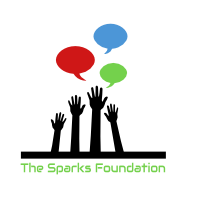

 ### 1. Importing the libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

 ### 2. Reading the data

In [2]:
#load dataset
datapath="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(datapath)

In [3]:
#show the dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Shape of Dataframe
data.shape

(25, 2)

### 3. EDA

[]

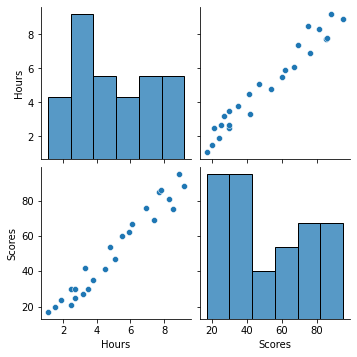

In [7]:
#check if it is a linear regression
sns.pairplot(data)
plt.plot()

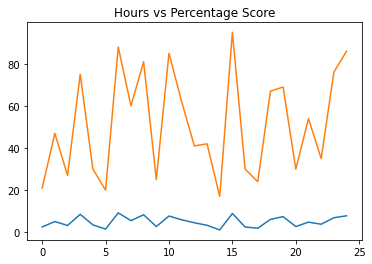

In [8]:
plt.plot(data)
plt.title("Hours vs Percentage Score")
plt.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

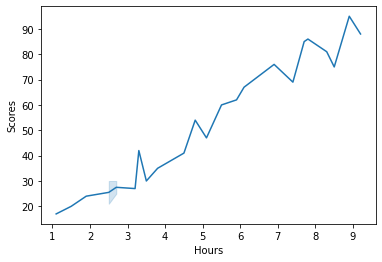

In [9]:
sns.lineplot(data['Hours'],data['Scores'])  #So, we can now proof that this is linearly dependent.

In [10]:
corr= data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### 4. Data Preparation

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [12]:
#To split this data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### 5. Model Building

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
print("Training completed")

Training completed


In [14]:
print('Training Score: ', round(lin_reg.score(x_train,y_train)*100,2),'%')
print('Testing Score: ', round(lin_reg.score(x_test,y_test)*100,2),'%')

Training Score:  95.16 %
Testing Score:  94.55 %


### 6. Regresion Line

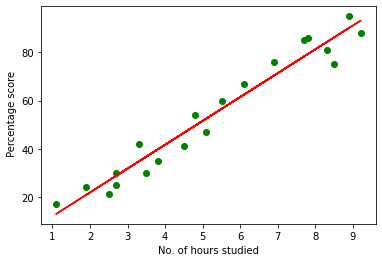

In [15]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,lin_reg.predict(x_train),color='Red')
plt.xlabel("No. of hours studied")
plt.ylabel(" Percentage score")
plt.show()

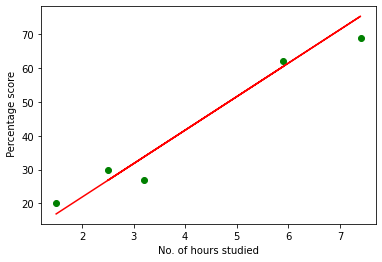

In [16]:
#Plotting the regression line on test data
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,lin_reg.predict(x_test),color='Red')
plt.xlabel("No. of hours studied")
plt.ylabel(" Percentage score")
plt.show()

###  7.What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
#for this prediction we will train the model on entire dataset

In [18]:
lin_reg_full=LinearRegression()
lin_reg_full.fit(x,y)

LinearRegression()

In [19]:
lin_reg_full2=LinearRegression(fit_intercept=True, normalize=True,)  #normalizing data 
lin_reg_full2.fit(x,y)

LinearRegression(normalize=True)

In [20]:
lin_reg_full.score(x,y)

0.9529481969048356

In [21]:
lin_reg_full2.score(x,y)  #same result accuracy as non normalized data since only one input variable is there

0.9529481969048356

In [22]:
lin_reg_full.coef_   #coefficient 'm' of linear equation y=m*x+C

array([9.77580339])

In [23]:
lin_reg_full.intercept_  #intercept C of linear equation y=m*x+C

2.48367340537321

In [24]:
x_topred=9.25

In [25]:
x_topred_array=np.array(x_topred)

In [26]:
x_input=x_topred_array.reshape(-1, 1)

In [27]:
y_output=lin_reg_full.predict(x_input)
y_output

array([92.90985477])

In [28]:
print("For number of hours studies",x_topred)
print("Predicted Score",y_output[0])

For number of hours studies 9.25
Predicted Score 92.9098547701573


### 8. Creating a Score_Prediction Function

In [29]:
def score_predictor():
    """This Function helps you to predict the percentage scores based on hours studied."""
    x=float(input('Enter Studied hours to predict your score: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = lin_reg_full.predict(test)
    print("For number of hours studies",x)
    print("Predicted Score",new_pred[0])

In [30]:
score_predictor()

Enter Studied hours to predict your score: 7
For number of hours studies 7.0
Predicted Score 70.91429714088548


### 9. Conclusion
### I have successfully done Prediction of Scores using Supervised ML algorithm. Model has got 95.29 % accuracy, which means model has trained very well in another words its a good fit model.

-----------
# <center><font color=15D77D>Thanks :)</font></center>